In [1]:
import pandas as pd

df = pd.read_csv("seeds_dataset.txt", sep="\t+", header=None)
# 1 area A,
# 2 perimeter P,
# 3 compactness C = 4*pi*A/P^2,
# 4 length of kernel,
# 5 width of kernel,
# 6 asymmetry coefficient
# 7 length of kernel groove.
# 8 target
df.columns = [
    "area",
    "perimeter",
    "compactness",
    "length_kernel",
    "width_kernel",
    "asymmetry_coefficient",
    "length_kernel_groove",
    "target",
]

<ipython-input-1-7ec6491df74e>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("seeds_dataset.txt", sep="\t+", header=None)


In [2]:
df.describe()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coefficient,length_kernel_groove,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


<Axes: xlabel='area', ylabel='asymmetry_coefficient'>

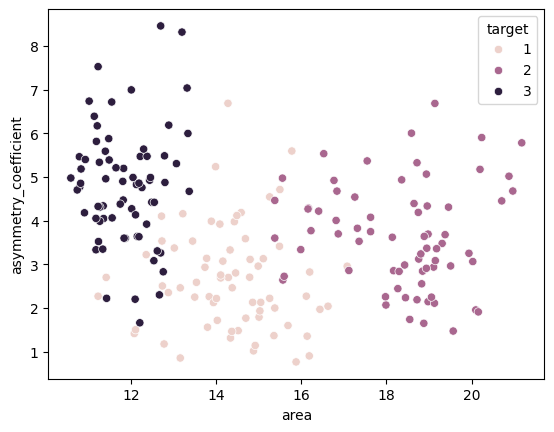

In [3]:
import seaborn as sns


sns.scatterplot(
    x="area",
    y="asymmetry_coefficient",
    data=df,
    hue="target",
    legend="full",
)

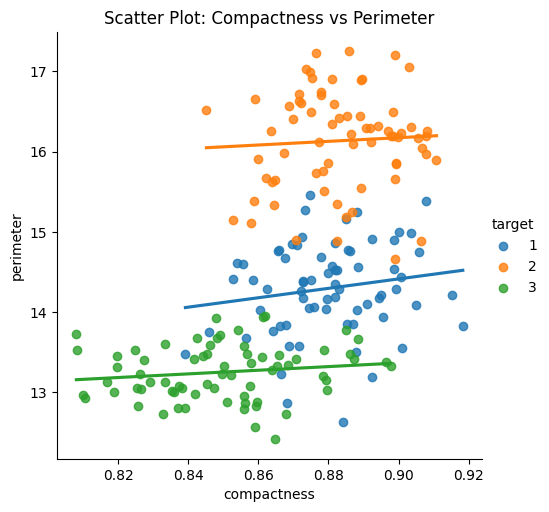

In [4]:
import matplotlib.pyplot as plt
sns.lmplot(x="compactness", y="perimeter", data=df, hue="target", legend="full", ci=True)
plt.title('Scatter Plot: Compactness vs Perimeter')
plt.show()

Text(0.5, 1.02, 'PairPlot for all Features with Hue as Target')

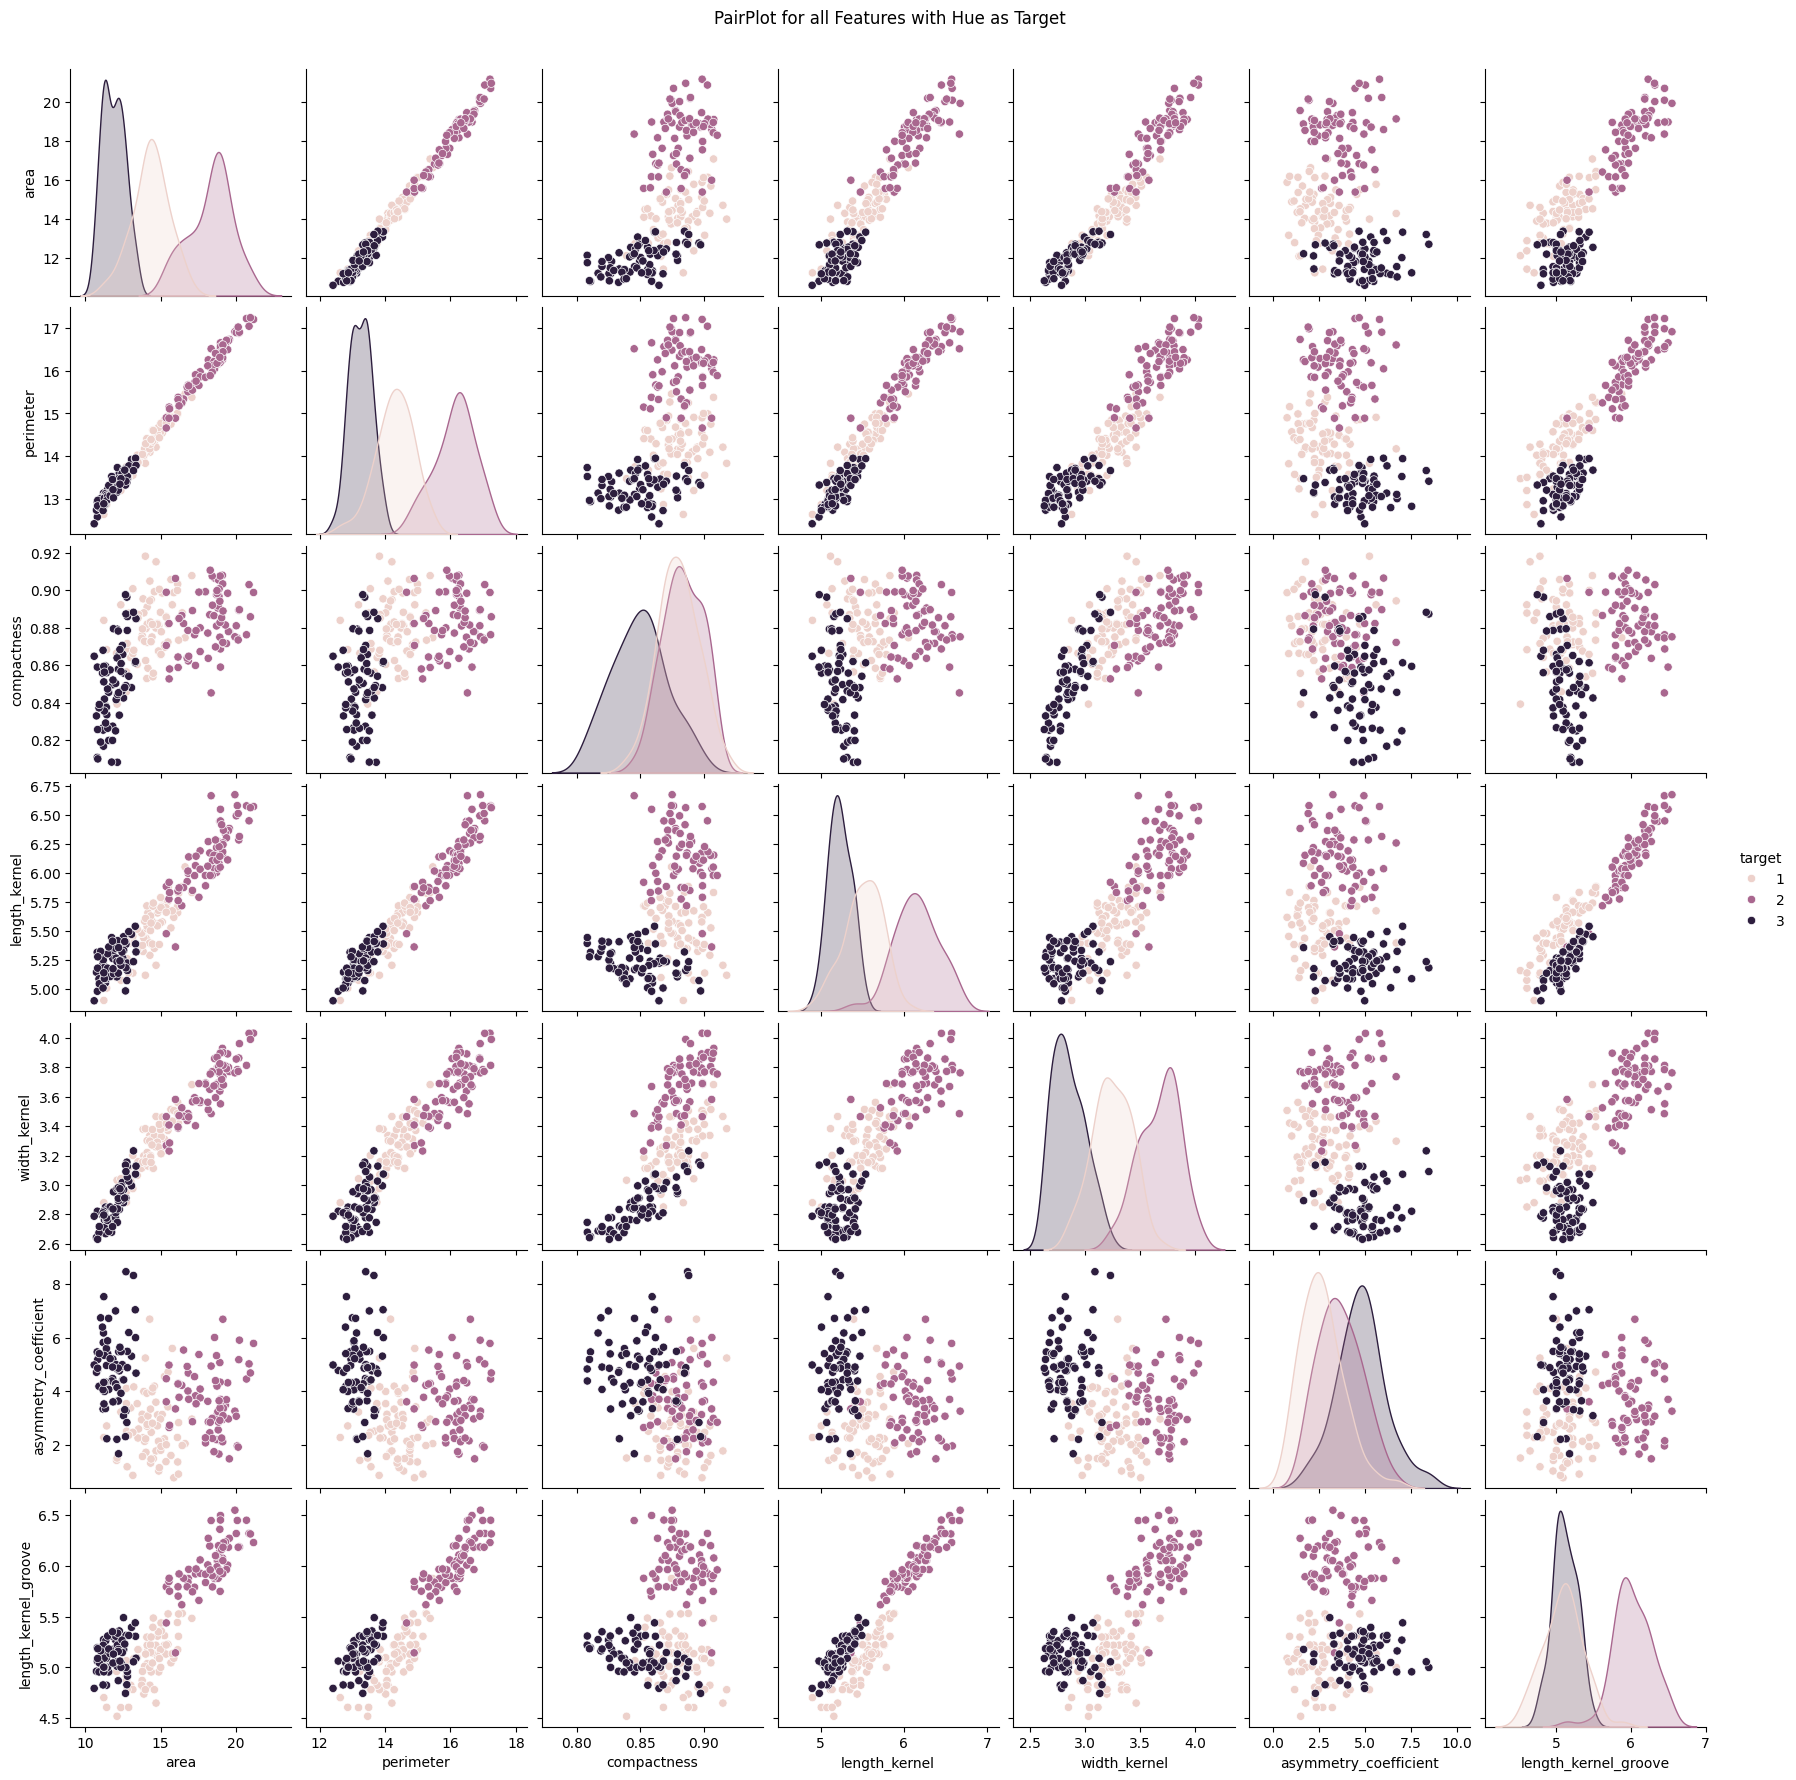

In [5]:
sns.pairplot(df, hue="target")
plt.suptitle('PairPlot for all Features with Hue as Target', y=1.02)

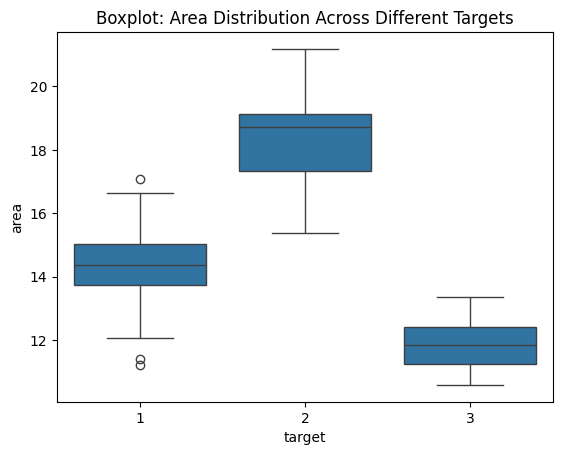

In [6]:
sns.boxplot(x="target", y="area", data=df)
plt.title('Boxplot: Area Distribution Across Different Targets')
plt.show()

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score


x = df.drop("target", axis=1)
y = df["target"]
inertia = {}
homogeneity = {}

c:\Users\Prajwal\OneDrive\Videos\SAIT\aDATA475\VS_Python\lab3\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Prajwal\OneDrive\Videos\SAIT\aDATA475\VS_Python\lab3\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Prajwal\OneDrive\Videos\SAIT\aDATA475\VS_Python\lab3\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Prajwal\OneDrive\Videos\SAIT\aDATA475\VS

Number of Clusters	Inertia	Homogeneity
1			2719.852410177952	0.0
2			1011.7123453151191	0.4322359529864315
3			587.3186115940429	0.6934607041029824
4			471.02714568221097	0.7293524911987582
5			386.15758977385656	0.7551631473897047
6			323.80509367474934	0.7699797669136059
7			277.5611792670319	0.7633915273436388
8			240.49303000300074	0.7913707831801231
9			216.70668614601925	0.7652594839990877


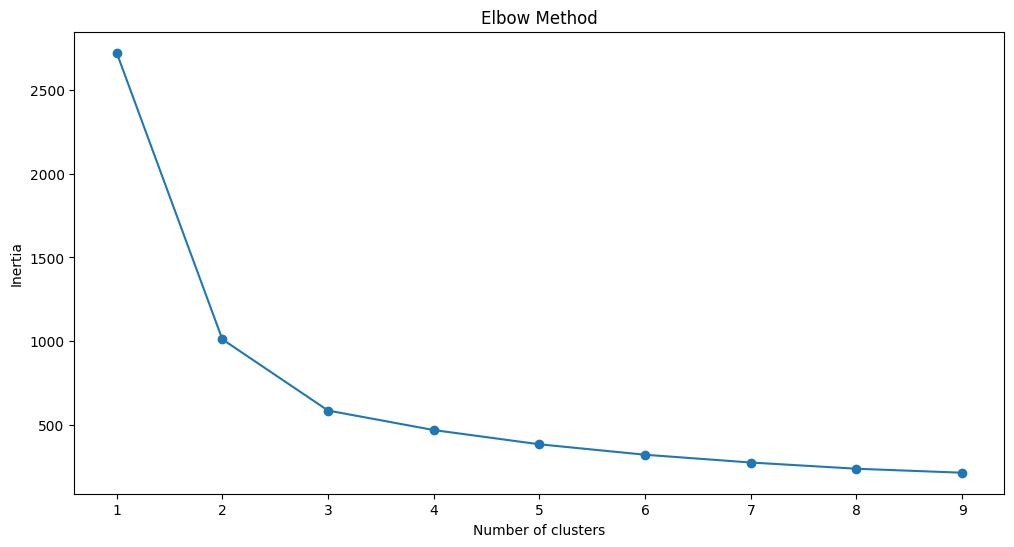

In [8]:
# use kmeans to loop over candidate number of clusters 
# store inertia and homogeneity score in each iteration

for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(x)
    labels = kmeans.labels_
    inertia[n_clusters] = kmeans.inertia_
    homogeneity[n_clusters] = homogeneity_score(y, labels)

print("Number of Clusters\tInertia\tHomogeneity")
for n_clusters in range(1, 10):
    print(f"{n_clusters}\t\t\t{inertia[n_clusters]}\t{homogeneity[n_clusters]}")

plt.figure(figsize=(12, 6))
plt.plot(list(inertia.keys()), list(inertia.values()), marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

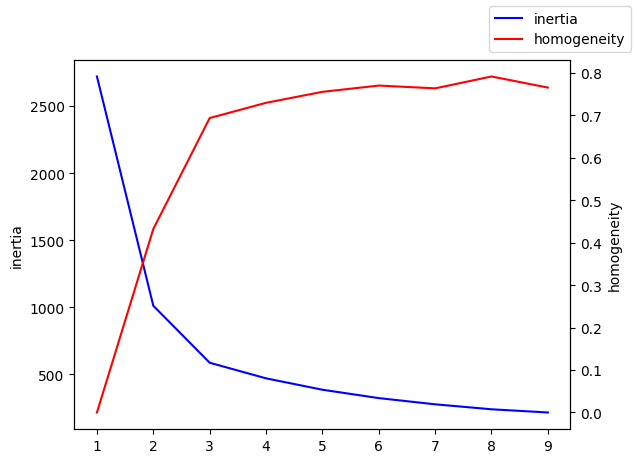

In [9]:
ax = sns.lineplot(
    x=list(inertia.keys()),
    y=list(inertia.values()),
    color="blue",
    label="inertia",
    legend=None,
)
ax.set_ylabel("inertia")
ax.twinx()
ax = sns.lineplot(
    x=list(homogeneity.keys()),
    y=list(homogeneity.values()),
    color="red",
    label="homogeneity",
    legend=None,
)
ax.set_ylabel("homogeneity")
ax.figure.legend()